*<div style="text-align: right;">30th October, 2024</div>**

**FINM 35000 - Topics in Economics**
<br>
Autumn 2024

<h2><center> Data Project 1 (Section 2.4 & 2.5) </center></h2>

### Import Statements

In [40]:
import requests
import string
from fredapi import Fred
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np
import re
import datetime as dt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


## Section 2: Measuring the tone of FOMC statements (90 points)

#### You will follow the method in Tadle (2022). The paper is linked on Canvas.

### 4. (30 points) Comment on the Tadle (2022) method. In light of your comments, describe and implement a different way to measure hawkish/dovish tone of FOMC statements. Be creative!

Tadle’s Method: Tadle (2022) employs a sentiment analysis framework specifically designed to evaluate the hawkish or dovish tone of Federal Open Market Committee (FOMC) statements. By analyzing specific terms and phrases that indicate a more aggressive (hawkish) or accommodative (dovish) stance, Tadle’s scoring mechanism assigns a sentiment score that attempts to quantify the overall tone of the statement. A higher score typically corresponds to a hawkish tone, implying a tighter monetary stance, while a lower score reflects a dovish or more accommodative policy stance.

Scoring Mechanism and Limitations: Tadle’s method relies heavily on predefined keywords and phrases associated with hawkish and dovish sentiments. This reliance on specific terms, while providing a straightforward scoring model, introduces certain limitations. First, it may lack adaptability to variations in language used across different FOMC statements over time. Additionally, it may miss subtleties in sentiment that are not captured by simple keyword matching, resulting in a less nuanced interpretation of the FOMC’s tone. Moreover, this approach assumes that certain words always carry the same sentiment, which can ignore context-specific meanings.

Proposed Model Explanation: The model used below  is a BERT-based sentiment analysis pipeline to assess the tone of FOMC statements. BERT, a transformer-based language model, is capable of understanding the context around words, which allows for a more nuanced analysis compared to simple keyword-based approaches. By analyzing the entire text and not just isolated terms, this model can capture subtleties and contextual shifts within each statement. The scores range from 0 to 1, with higher scores indicating a stronger sentiment toward hawkishness. Additionally, the model classifies tones as hawkish, dovish, or neutral based on score thresholds, providing a structured interpretation of sentiment. BERT is a fine tuned model developped by Google, meaning that it has already been trained on large general language or large text. The limitation of this model might be the fact that the model has not been trained specifically on financial term and language.

Advantages over Tadle’s Method: This BERT-based approach addresses several limitations of Tadle’s model. First, its context-awareness allows it to discern the meaning of words based on surrounding context, which is particularly valuable for FOMC statements that may use nuanced or evolving language. Second, the model is adaptable to changing language patterns and does not rely on static keyword lists.

The code implements a sentiment analysis pipeline using a pre-trained BERT model capable of handling multilingual text sequences. The goal is to determine the tone of FOMC statements as either "Hawkish," "Dovish," or "Neutral" based on sentiment scores. First, the sentiment-analysis pipeline is initialized with a model that can analyze longer text sequences. A custom function, classify_tone, is then defined to categorize sentiment scores into three categories: "Hawkish" (for high scores), "Dovish" (for low scores), and "Neutral" (for moderate scores). The model analyzes each statement's text, assigning a sentiment score to it, and then applies the classify_tone function to determine the statement's tone. Finally, the updated DataFrame, which includes sentiment scores and tones, is displayed to show the analysis results.

In [41]:
# Initialize the sentiment analysis pipeline with a model that can handle longer sequences
sentiment_analyzer = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Define a function to classify hawkish, dovish, or neutral tones based on sentiment scores
def classify_tone(score):
    if score >= 0.75:
        return "Hawkish"
    elif score <= 0.25:
        return "Dovish"
    else:
        return "Neutral"

# Apply sentiment analysis to each statement and classify tone
fomc_df['Sentiment Score'] = fomc_df['Statement Text'].apply(lambda text: sentiment_analyzer(text[:512])[0]['score'])
fomc_df['Tone'] = fomc_df['Sentiment Score'].apply(classify_tone)

# Display the updated DataFrame with sentiment scores and tones
print(fomc_df[['Date', 'Statement Text', 'Sentiment Score', 'Tone']])

          Date                                     Statement Text  \
0   2000-01-19  Reports from most Federal Reserve Districts in...   
1   2000-03-08  Reports from the twelve Federal Reserve Distri...   
2   2000-05-03  Reports from the twelve Federal Reserve Distri...   
3   2000-06-14  Reports from the Federal Reserve Districts ind...   
4   2000-08-09  The information collected for these reports su...   
..         ...                                                ...   
120 2024-03-20  March 20, 2024\nFederal Reserve issues FOMC st...   
121 2024-05-01  May 01, 2024\nFederal Reserve issues FOMC stat...   
122 2024-06-12  June 12, 2024\nFederal Reserve issues FOMC sta...   
123 2024-07-31  July 31, 2024\nFederal Reserve issues FOMC sta...   
124 2024-09-18  September 18, 2024\nFederal Reserve issues FOM...   

     Sentiment Score     Tone  
0           0.310867  Neutral  
1           0.353083  Neutral  
2           0.348307  Neutral  
3           0.474146  Neutral  
4          

### 5. (10 points) Plot your sentiment score, together with Tadle’s and changes in policy target. Compute the correlation matrix between the three. Comment on your results.

The code below performs a comparative analysis between sentiment scores derived from both methods. After standardizing column names and converting date columns to datetime format, the code merges these datasets based on common dates to create a unified DataFrame. The merged DataFrame is normalized using a MinMaxScaler to ensure all variables are on a similar scale for comparison before plotting the results.

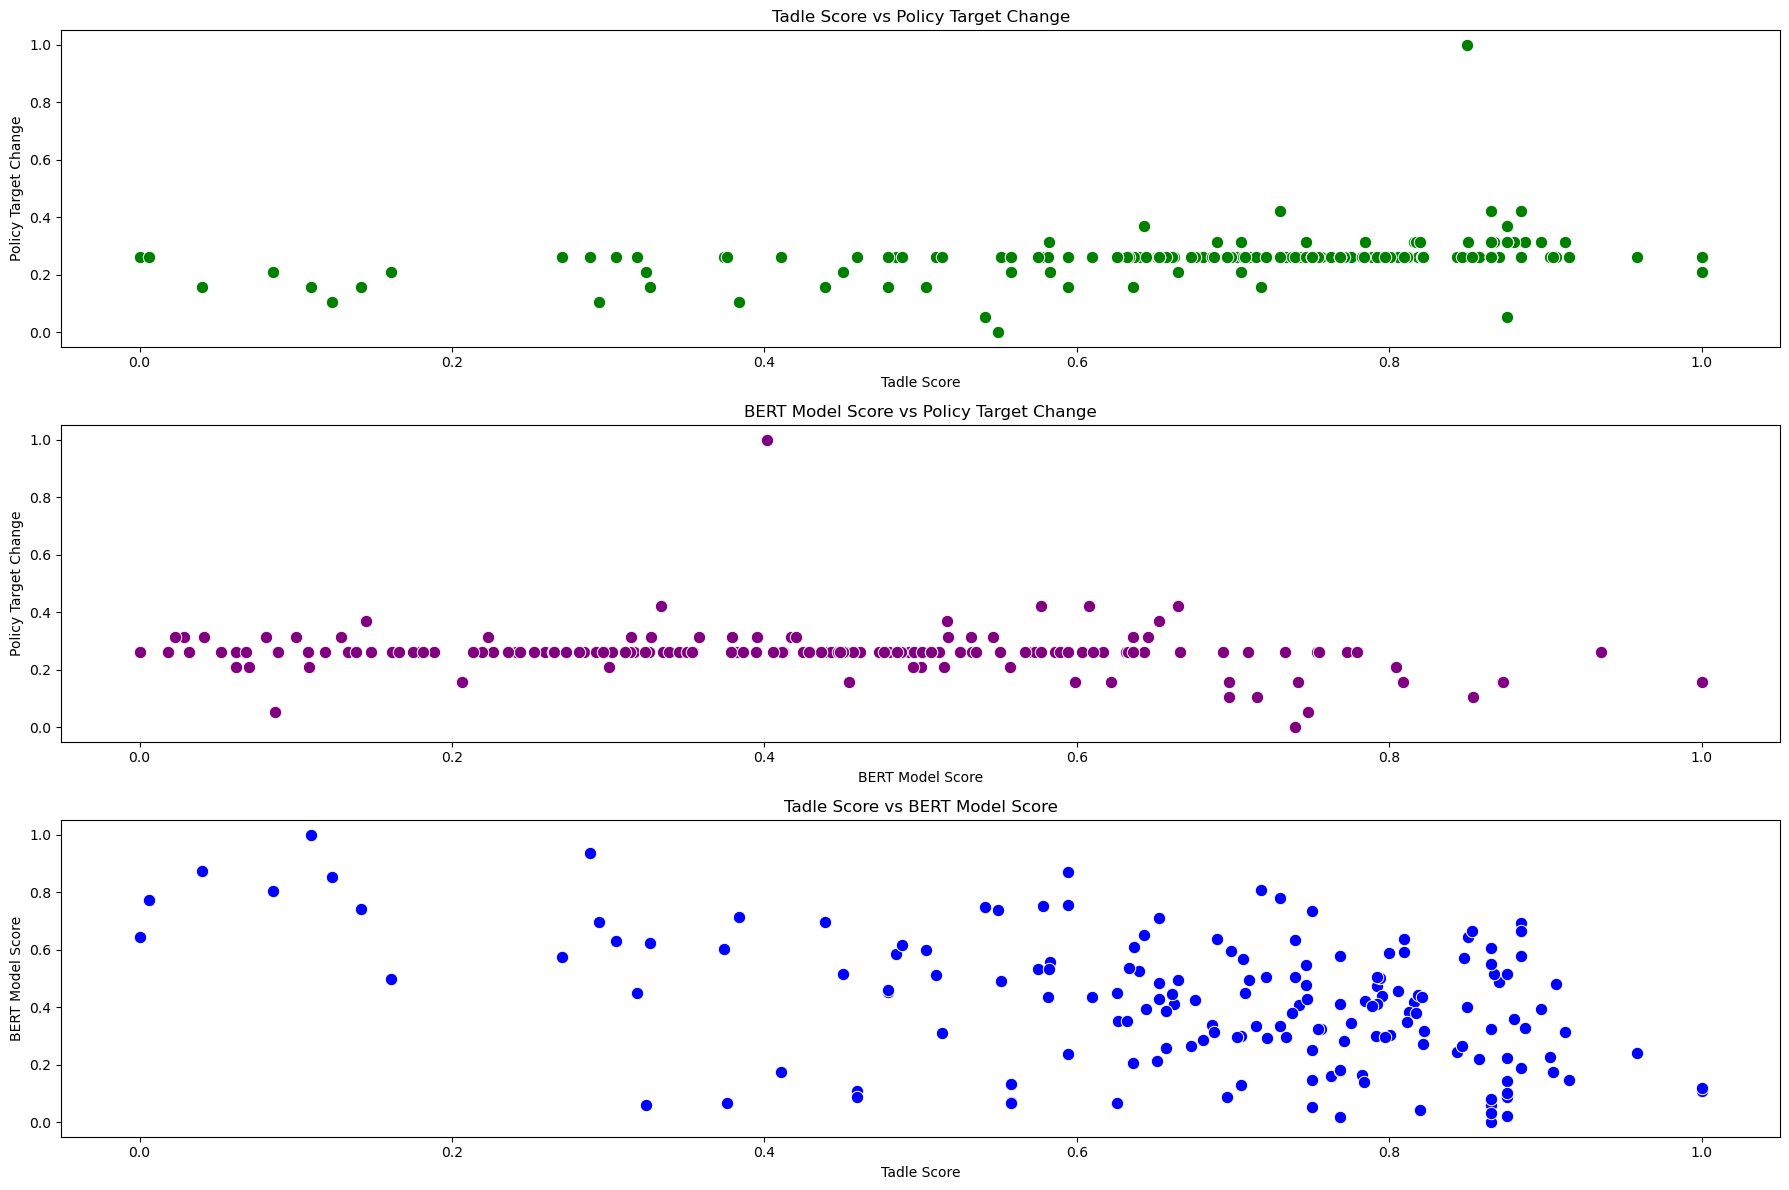

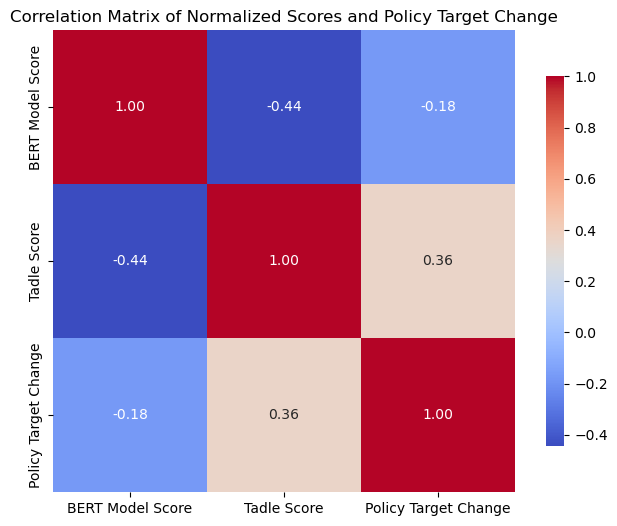

Correlation Matrix:
                      BERT Model Score  Tadle Score  Policy Target Change
BERT Model Score              1.000000    -0.443954             -0.177398
Tadle Score                  -0.443954     1.000000              0.361893
Policy Target Change         -0.177398     0.361893              1.000000


In [42]:

# Load Tadle's sentiment score and policy target change datasets
tadle_sentiment_score = pd.read_excel("/Users/yasmineouattara/Documents/GitHub/Topics_Economics/Output_Files/FOMC_statement_date_sentiment_score.xlsx")
change_target_rate = pd.read_csv("/Users/yasmineouattara/Documents/GitHub/Topics_Economics/Data/change_target_rate.csv")

# Rename columns for clarity
tadle_sentiment_score.rename(columns={"Index Score": "Tadle Score"}, inplace=True)
change_target_rate.rename(columns={"Change_Target_Rate": "Policy Target Change"}, inplace=True)

# Convert 'Date' columns to datetime format
fomc_df['Date'] = pd.to_datetime(fomc_df['Date'])
tadle_sentiment_score['Date'] = pd.to_datetime(tadle_sentiment_score['Date'])
change_target_rate['Date'] = pd.to_datetime(change_target_rate['Date'])

# Merge the dataframes on 'Date'
combined_df = fomc_df[['Date', 'Sentiment Score']].rename(columns={"Sentiment Score": "BERT Model Score"}).merge(
    tadle_sentiment_score[['Date', 'Tadle Score']], on='Date'
).merge(
    change_target_rate[['Date', 'Policy Target Change']], on='Date'
).dropna()  # Drop rows with NaN values if necessary

# Initialize the scaler and apply it to the relevant columns
scaler = MinMaxScaler()
combined_df[['BERT Model Score', 'Tadle Score', 'Policy Target Change']] = scaler.fit_transform(
    combined_df[['BERT Model Score', 'Tadle Score', 'Policy Target Change']]
)

# Plotting the scatter plots
plt.figure(figsize=(18, 12))

# Scatter plot 1: Tadle Score vs Policy Target Change
plt.subplot(3, 1, 1)
sns.scatterplot(data=combined_df, x='Tadle Score', y='Policy Target Change', color='green', s=80)
plt.title("Tadle Score vs Policy Target Change")
plt.xlabel("Tadle Score")
plt.ylabel("Policy Target Change")

# Scatter plot 2: BERT Model Score vs Policy Target Change
plt.subplot(3, 1, 2)
sns.scatterplot(data=combined_df, x='BERT Model Score', y='Policy Target Change', color='purple', s=80)
plt.title("BERT Model Score vs Policy Target Change")
plt.xlabel("BERT Model Score")
plt.ylabel("Policy Target Change")

# Scatter plot 3: Tadle Score vs BERT Model Score
plt.subplot(3, 1, 3)
sns.scatterplot(data=combined_df, x='Tadle Score', y='BERT Model Score', color='blue', s=80)
plt.title("Tadle Score vs BERT Model Score")
plt.xlabel("Tadle Score")
plt.ylabel("BERT Model Score")

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Calculate and display the correlation matrix
correlation_matrix = combined_df[['BERT Model Score', 'Tadle Score', 'Policy Target Change']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Normalized Scores and Policy Target Change")
plt.show()

# Display the correlation matrix in a textual format for reference
print("Correlation Matrix:")
print(correlation_matrix)


Tadle Score vs. Policy Target Change:

This plot examines the relationship between the Tadle Score and the Policy Target Change. The distribution of points suggests a relatively spread-out pattern, with no strong linear correlation. The lack of a clear trend or clustering implies that variations in Tadle Score may not have a consistent impact on the Policy Target Change. The data points are spread across various Tadle Score levels without showing a distinct directional impact on policy adjustments.

BERT Model Score vs. Policy Target Change:

In this plot, the BERT Model Score is plotted against Policy Target Change. Similar to the first scatter plot, there doesn’t seem to be a strong pattern or relationship. The Policy Target Change values do not appear to vary in a systematic way with changes in BERT Model Score. This suggests that while the BERT model provides sentiment insights, these do not directly correlate with policy rate adjustments, at least within this data's scope.

Tadle Score vs. BERT Model Score:

This scatter plot shows the relationship between the Tadle Score and the BERT Model Score. Here, we observe a more diverse spread across the axis, indicating that while both metrics attempt to capture sentiment, they may measure slightly different aspects or respond differently to the same underlying data. There’s a slight clustering in certain areas, suggesting some level of agreement in sentiment interpretation between Tadle and BERT, but not a strong correlation. This implies that the two scores might complement each other by offering distinct perspectives on sentiment.


The correlation matrix the normalized values of the BERT model Sentiment Score, Tadle Score, and Policy Target Change is presented by the heatmap. The strongest correlation here is a negative one between the BERT model Sentiment Score and Tadle Score (-0.44), indicating that when one sentiment score is high, the other tends to be lower, suggesting a possible divergence in how sentiment is interpreted between the two models. This may imply that each sentiment measure captures different nuances in FOMC statements. Additionally, we observe a mild positive correlation (0.36) between Tadle Score and Policy Target Change. This suggests that as the Tadle Score becomes more hawkish (or dovish), there is a slight tendency for policy adjustments to align, potentially hinting at Tadle’s score being more sensitive to economic shifts that result in policy changes. The weaker negative correlation (-0.18) between BERT Model Sentiment Score and Policy Target Change indicates that while BERT model sentiment measure also reacts to the tone of FOMC statements, it may be less directly aligned with the actual policy changes, emphasizing its potential as an independent perspective on sentiment that complements Tadle’s model.